100%|██████████| 170498071/170498071 [00:13<00:00, 12292973.85it/s]


Extracting ./data/cifar-10-python.tar.gz to ./data
Files already downloaded and verified
Training models with LeakyReLU activation and comparing SGD vs Adam optimizers...

Epoch [1/50] - SGD Train Acc: 17.23%, Adam Train Acc: 49.37%
Epoch [2/50] - SGD Train Acc: 22.17%, Adam Train Acc: 55.72%
Epoch [3/50] - SGD Train Acc: 24.32%, Adam Train Acc: 59.47%
Epoch [4/50] - SGD Train Acc: 25.09%, Adam Train Acc: 63.42%
Epoch [5/50] - SGD Train Acc: 25.58%, Adam Train Acc: 67.79%
Epoch [6/50] - SGD Train Acc: 25.93%, Adam Train Acc: 71.22%
Epoch [7/50] - SGD Train Acc: 26.19%, Adam Train Acc: 75.64%
Epoch [8/50] - SGD Train Acc: 26.48%, Adam Train Acc: 78.89%
Epoch [9/50] - SGD Train Acc: 26.83%, Adam Train Acc: 82.43%
Epoch [10/50] - SGD Train Acc: 27.22%, Adam Train Acc: 83.86%
Epoch [11/50] - SGD Train Acc: 27.60%, Adam Train Acc: 86.72%
Epoch [12/50] - SGD Train Acc: 28.01%, Adam Train Acc: 87.28%
Epoch [13/50] - SGD Train Acc: 28.33%, Adam Train Acc: 91.56%
Epoch [14/50] - SGD Train Acc: 

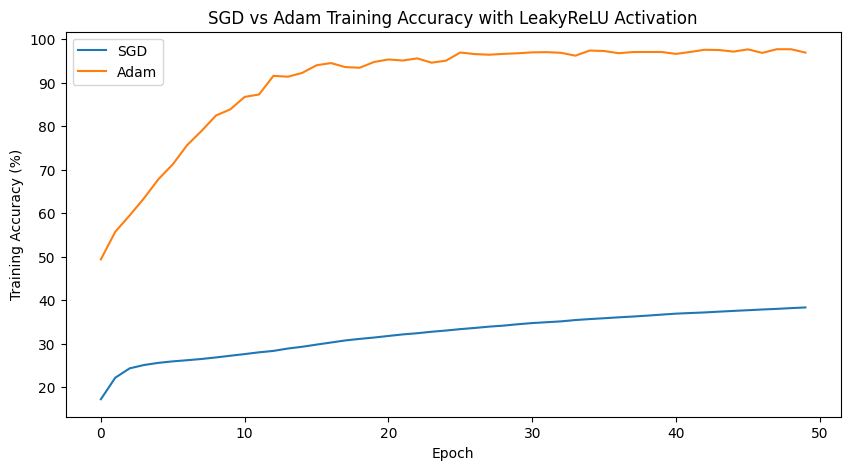


Training models with Adam optimizer and comparing LeakyReLU vs Sigmoid activations...

Epoch [1/50] - LeakyReLU Train Acc: 50.07%, Sigmoid Train Acc: 44.26%
Epoch [2/50] - LeakyReLU Train Acc: 54.98%, Sigmoid Train Acc: 49.01%
Epoch [3/50] - LeakyReLU Train Acc: 60.25%, Sigmoid Train Acc: 53.85%
Epoch [4/50] - LeakyReLU Train Acc: 63.66%, Sigmoid Train Acc: 55.83%
Epoch [5/50] - LeakyReLU Train Acc: 67.33%, Sigmoid Train Acc: 59.47%
Epoch [6/50] - LeakyReLU Train Acc: 71.72%, Sigmoid Train Acc: 62.07%
Epoch [7/50] - LeakyReLU Train Acc: 75.14%, Sigmoid Train Acc: 66.54%
Epoch [8/50] - LeakyReLU Train Acc: 78.69%, Sigmoid Train Acc: 70.73%
Epoch [9/50] - LeakyReLU Train Acc: 82.93%, Sigmoid Train Acc: 74.02%
Epoch [10/50] - LeakyReLU Train Acc: 84.92%, Sigmoid Train Acc: 78.46%
Epoch [11/50] - LeakyReLU Train Acc: 86.53%, Sigmoid Train Acc: 78.82%
Epoch [12/50] - LeakyReLU Train Acc: 89.55%, Sigmoid Train Acc: 83.09%
Epoch [13/50] - LeakyReLU Train Acc: 91.87%, Sigmoid Train Acc: 86.42

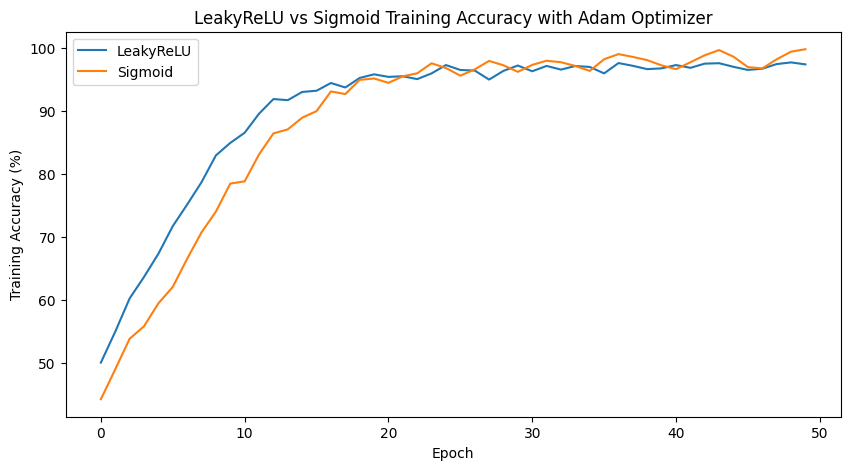


Training model with Dropout and evaluating generalization error...

Epoch [1/50] - Train Acc: 49.31%, Test Acc: 47.22%
Epoch [2/50] - Train Acc: 53.71%, Test Acc: 50.44%
Epoch [3/50] - Train Acc: 58.05%, Test Acc: 52.27%
Epoch [4/50] - Train Acc: 60.27%, Test Acc: 51.81%
Epoch [5/50] - Train Acc: 64.27%, Test Acc: 53.32%
Epoch [6/50] - Train Acc: 69.08%, Test Acc: 54.68%
Epoch [7/50] - Train Acc: 71.23%, Test Acc: 54.10%
Epoch [8/50] - Train Acc: 73.14%, Test Acc: 54.31%
Epoch [9/50] - Train Acc: 75.39%, Test Acc: 54.61%
Epoch [10/50] - Train Acc: 80.01%, Test Acc: 55.38%
Epoch [11/50] - Train Acc: 82.81%, Test Acc: 56.28%
Epoch [12/50] - Train Acc: 84.64%, Test Acc: 55.81%
Epoch [13/50] - Train Acc: 86.66%, Test Acc: 55.76%
Epoch [14/50] - Train Acc: 88.50%, Test Acc: 55.13%
Epoch [15/50] - Train Acc: 89.63%, Test Acc: 55.29%
Epoch [16/50] - Train Acc: 89.64%, Test Acc: 55.60%
Epoch [17/50] - Train Acc: 90.83%, Test Acc: 55.37%
Epoch [18/50] - Train Acc: 92.42%, Test Acc: 55.76%
Epoc

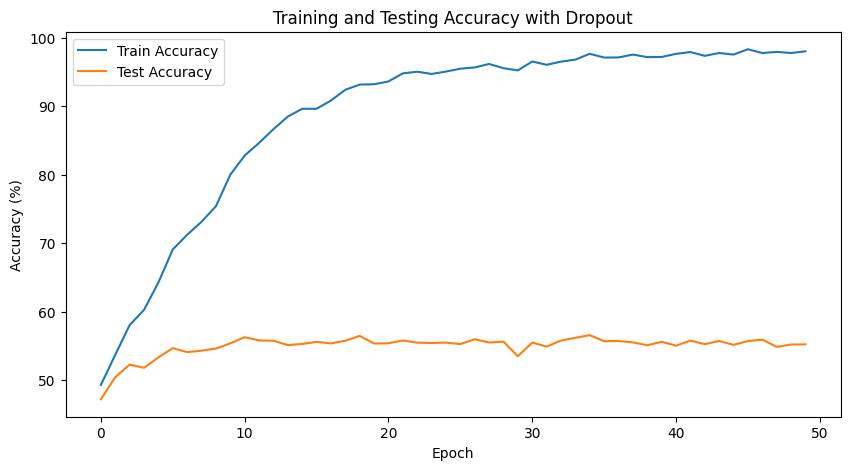

In [ ]:
# Import necessary libraries
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt

# Set device configuration
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# Training parameters
n_epochs = 50
batch_size = 256
input_size = 3 * 32 * 32  # CIFAR10 input dimension
hidden_size = 1024
num_classes = 10  # CIFAR10 has 10 classes

# Define data transformations and load datasets
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5)),
])

train_dataset = torchvision.datasets.CIFAR10(
    root='./data', train=True, transform=transform, download=True
)
test_dataset = torchvision.datasets.CIFAR10(
    root='./data', train=False, transform=transform, download=True
)

train_loader = torch.utils.data.DataLoader(
    dataset=train_dataset, batch_size=batch_size, shuffle=True
)
test_loader = torch.utils.data.DataLoader(
    dataset=test_dataset, batch_size=batch_size, shuffle=False
)

# Define the MLP model
class MLP(nn.Module):
    def __init__(self, input_size, hidden_size, activation):
        super(MLP, self).__init__()
        self.layer1 = nn.Linear(input_size, hidden_size)
        self.layer2 = nn.Linear(hidden_size, hidden_size)
        self.layer3 = nn.Linear(hidden_size, num_classes)
        self.activation = activation

    def forward(self, x):
        x = x.view(-1, input_size)
        x = self.activation(self.layer1(x))
        x = self.activation(self.layer2(x))
        x = self.layer3(x)
        return x

# Define the MLP model with Dropout
class MLPWithDropout(nn.Module):
    def __init__(self, input_size, hidden_size, activation, dropout_prob=0.1):
        super(MLPWithDropout, self).__init__()
        self.layer1 = nn.Linear(input_size, hidden_size)
        self.dropout1 = nn.Dropout(dropout_prob)
        self.layer2 = nn.Linear(hidden_size, hidden_size)
        self.dropout2 = nn.Dropout(dropout_prob)
        self.layer3 = nn.Linear(hidden_size, num_classes)
        self.activation = activation

    def forward(self, x):
        x = x.view(-1, input_size)
        x = self.dropout1(self.activation(self.layer1(x)))
        x = self.dropout2(self.activation(self.layer2(x)))
        x = self.layer3(x)
        return x

# Loss function
criterion = nn.CrossEntropyLoss()

# Function to train the model
def train_model(model, optimizer):
    model.train()
    total_loss = 0
    for inputs, labels in train_loader:
        inputs, labels = inputs.to(device), labels.to(device)
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        total_loss += loss.item()
    return total_loss

# Function to calculate accuracy
def calculate_accuracy(model, loader):
    model.eval()
    correct = total = 0
    with torch.no_grad():
        for inputs, labels in loader:
            inputs, labels = inputs.to(device), labels.to(device)
            outputs = model(inputs)
            _, predicted = outputs.max(1)
            total += labels.size(0)
            correct += predicted.eq(labels).sum().item()
    return 100 * correct / total

# Task 3: Compare SGD and Adam Optimizers with LeakyReLU activation
activation = nn.LeakyReLU()

# Initialize models
model_sgd = MLP(input_size, hidden_size, activation).to(device)
model_adam = MLP(input_size, hidden_size, activation).to(device)

# Optimizers
optimizer_sgd = optim.SGD(model_sgd.parameters(), lr=0.001)
optimizer_adam = optim.Adam(model_adam.parameters(), lr=0.001)

# Training loop for SGD and Adam
train_acc_sgd = []
train_acc_adam = []

print("Training models with LeakyReLU activation and comparing SGD vs Adam optimizers...\n")
for epoch in range(n_epochs):
    # Train with SGD optimizer
    train_model(model_sgd, optimizer_sgd)
    acc_sgd = calculate_accuracy(model_sgd, train_loader)
    train_acc_sgd.append(acc_sgd)

    # Train with Adam optimizer
    train_model(model_adam, optimizer_adam)
    acc_adam = calculate_accuracy(model_adam, train_loader)
    train_acc_adam.append(acc_adam)

    print(f"Epoch [{epoch+1}/{n_epochs}] - SGD Train Acc: {acc_sgd:.2f}%, Adam Train Acc: {acc_adam:.2f}%")

# Plotting results
plt.figure(figsize=(10,5))
plt.plot(train_acc_sgd, label='SGD')
plt.plot(train_acc_adam, label='Adam')
plt.xlabel('Epoch')
plt.ylabel('Training Accuracy (%)')
plt.title('SGD vs Adam Training Accuracy with LeakyReLU Activation')
plt.legend()
plt.show()

# Task 4: Compare LeakyReLU and Sigmoid Activations with Adam optimizer
# Re-initialize models with different activations
activation_leaky = nn.LeakyReLU()
activation_sigmoid = nn.Sigmoid()

model_leaky = MLP(input_size, hidden_size, activation_leaky).to(device)
model_sigmoid = MLP(input_size, hidden_size, activation_sigmoid).to(device)

# Optimizers
optimizer_leaky = optim.Adam(model_leaky.parameters(), lr=0.001)
optimizer_sigmoid = optim.Adam(model_sigmoid.parameters(), lr=0.001)

# Training loop for different activations
train_acc_leaky = []
train_acc_sigmoid = []

print("\nTraining models with Adam optimizer and comparing LeakyReLU vs Sigmoid activations...\n")
for epoch in range(n_epochs):
    # Train with LeakyReLU activation
    train_model(model_leaky, optimizer_leaky)
    acc_leaky = calculate_accuracy(model_leaky, train_loader)
    train_acc_leaky.append(acc_leaky)

    # Train with Sigmoid activation
    train_model(model_sigmoid, optimizer_sigmoid)
    acc_sigmoid = calculate_accuracy(model_sigmoid, train_loader)
    train_acc_sigmoid.append(acc_sigmoid)

    print(f"Epoch [{epoch+1}/{n_epochs}] - LeakyReLU Train Acc: {acc_leaky:.2f}%, Sigmoid Train Acc: {acc_sigmoid:.2f}%")

# Plotting results
plt.figure(figsize=(10,5))
plt.plot(train_acc_leaky, label='LeakyReLU')
plt.plot(train_acc_sigmoid, label='Sigmoid')
plt.xlabel('Epoch')
plt.ylabel('Training Accuracy (%)')
plt.title('LeakyReLU vs Sigmoid Training Accuracy with Adam Optimizer')
plt.legend()
plt.show()

# Task 5: Apply Dropout and Evaluate Generalization Error
# Initialize model with Dropout
model_dropout = MLPWithDropout(input_size, hidden_size, activation_leaky, dropout_prob=0.1).to(device)
optimizer_dropout = optim.Adam(model_dropout.parameters(), lr=0.001)

# Training loop with Dropout
train_acc_dropout = []
test_acc_dropout = []

print("\nTraining model with Dropout and evaluating generalization error...\n")
for epoch in range(n_epochs):
    # Train the model
    train_model(model_dropout, optimizer_dropout)

    # Evaluate accuracy
    with torch.no_grad():
        model_dropout.eval()
        acc_train = calculate_accuracy(model_dropout, train_loader)
        acc_test = calculate_accuracy(model_dropout, test_loader)

    train_acc_dropout.append(acc_train)
    test_acc_dropout.append(acc_test)

    print(f"Epoch [{epoch+1}/{n_epochs}] - Train Acc: {acc_train:.2f}%, Test Acc: {acc_test:.2f}%")

# Plotting results
plt.figure(figsize=(10,5))
plt.plot(train_acc_dropout, label='Train Accuracy')
plt.plot(test_acc_dropout, label='Test Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy (%)')
plt.title('Training and Testing Accuracy with Dropout')
plt.legend()
plt.show()
